In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
living=pd.read_csv("./data/생활인구.csv",sep=',',encoding = "EUC-KR")
workers=pd.read_csv("./data/직장인구.csv",sep=',',encoding = "EUC-KR")
resident=pd.read_csv("./data/상주인구.csv",sep=',',encoding = "EUC-KR")
apt=pd.read_csv("./data/아파트.csv",sep=',',encoding = "EUC-KR")
store=pd.read_csv("./data/점포.csv",sep=',',encoding = "EUC-KR")
facility=pd.read_csv("./data/집객시설.csv",sep=',',encoding = "EUC-KR")
sales=pd.read_csv("./data/추정매출.csv",sep=',',encoding = "EUC-KR")

In [38]:
store=pd.read_csv("./data/점포.csv",sep=',',encoding = "EUC-KR")

## 1. 서울시 우리마을가게 상권분석서비스 데이터 전처리
### 1-1. 생활 인구

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 총 생활인구 수 데이터를 추출한다.

In [3]:
living = living.fillna(0)

In [4]:
living = living[['기준 년코드', ' 상권_구분_코드_명', '상권_코드_명', '총_생활인구_수']]
living = living[living['기준 년코드'] >= 2020]
living

,기준 년코드,상권_구분_코드_명,상권_코드_명,총_생활인구_수
0,2022,관광특구,강남 마이스 관광특구,106859
1,2022,관광특구,잠실 관광특구,3561819
2,2022,관광특구,종로?청계 관광특구,4041501
3,2022,관광특구,동대문패션타운 관광특구,3242889
4,2022,관광특구,명동 남대문 북창동 다동 무교동 관광특구,4382710
5,2022,관광특구,이태원 관광특구,2163881
6,2022,관광특구,강남 마이스 관광특구,92815
7,2022,관광특구,잠실 관광특구,3221641
8,2022,관광특구,종로?청계 관광특구,3610698
9,2022,관광특구,동대문패션타운 관광특구,2996402


In [5]:
living.columns = ['기준_년_코드', '상권_구분_코드_명', '상권_코드_명', '총_생활인구_수']
living

,기준_년_코드,상권_구분_코드_명,상권_코드_명,총_생활인구_수
0,2022,관광특구,강남 마이스 관광특구,106859
1,2022,관광특구,잠실 관광특구,3561819
2,2022,관광특구,종로?청계 관광특구,4041501
3,2022,관광특구,동대문패션타운 관광특구,3242889
4,2022,관광특구,명동 남대문 북창동 다동 무교동 관광특구,4382710
5,2022,관광특구,이태원 관광특구,2163881
6,2022,관광특구,강남 마이스 관광특구,92815
7,2022,관광특구,잠실 관광특구,3221641
8,2022,관광특구,종로?청계 관광특구,3610698
9,2022,관광특구,동대문패션타운 관광특구,2996402


In [6]:
living = living[['총_생활인구_수']].groupby([living['상권_구분_코드_명'], living['상권_코드_명']]).sum()
# living

In [7]:
living['상권_구분_코드_명'] = living.index.map(lambda x: x[0])
living['상권_코드_명'] = living.index.map(lambda x: x[1])
# living

In [8]:
living = living.reset_index(drop=True)

In [9]:
living

,총_생활인구_수,상권_구분_코드_명,상권_코드_명
0,946905,관광특구,강남 마이스 관광특구
1,31040824,관광특구,동대문패션타운 관광특구
2,37673727,관광특구,명동 남대문 북창동 다동 무교동 관광특구
3,16874995,관광특구,이태원 관광특구
4,31172746,관광특구,잠실 관광특구
5,38106908,관광특구,종로?청계 관광특구


### 1-2. 직장 인구

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 총 직장 인구를 추출한다.

In [10]:
workers = workers.fillna(0)

In [11]:
workers = workers[['기준_년월_코드', '상권_구분_코드_명', '상권_코드_명', '총_직장_인구_수']]
workers = workers[workers['기준_년월_코드'] >= 2020]
workers

,기준_년월_코드,상권_구분_코드_명,상권_코드_명,총_직장_인구_수
0,2021,골목상권,북촌로5길,503
1,2021,골목상권,사당로8길,131
2,2021,전통시장,남평화시장,5
3,2021,골목상권,백범로90길,535
4,2021,골목상권,서빙고로71길,432
...,...,...,...,...
11795,2020,전통시장,강남개포시장,138
11796,2020,전통시장,강남골목시장,168
11797,2020,전통시장,풍납시장,51
11798,2020,전통시장,둔촌역전통시장,224


In [12]:
workers = pd.DataFrame(workers['총_직장_인구_수'].groupby([workers['상권_구분_코드_명'], workers['상권_코드_명']]).sum())
workers

총_직장_인구_수
상권_구분_코드_명 상권_코드_명             
골목상권       가로공원로58길         728
           가로공원로76가길       1344
           가로공원로80길        2160
           가마산로61길          376
           가산로3길           7992
...                         ...
전통시장       화곡중앙골목시장         600
           화양제일골목시장         344
           회기시장             440
           후암시장             120
           흑석시장             624

[1475 rows x 1 columns]

In [13]:
workers['상권_구분_코드_명'] = workers.index.map(lambda x: x[0])
workers['상권_코드_명'] = workers.index.map(lambda x : x[1])

In [15]:
workers = workers.reset_index(drop=True)
workers

,총_직장_인구_수,상권_구분_코드_명,상권_코드_명
0,728,골목상권,가로공원로58길
1,1344,골목상권,가로공원로76가길
2,2160,골목상권,가로공원로80길
3,376,골목상권,가마산로61길
4,7992,골목상권,가산로3길
...,...,...,...
1470,600,전통시장,화곡중앙골목시장
1471,344,전통시장,화양제일골목시장
1472,440,전통시장,회기시장
1473,120,전통시장,후암시장


### 1-3. 상주 인구

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 총 상주인구 수를 추출한다.

In [16]:
resident = resident.fillna(0)
resident = resident[['기준_년_코드', '상권_구분_코드_명', '상권 코드 명', '총 상주인구 수']]
resident = pd.DataFrame(resident['총 상주인구 수'].groupby([resident['상권_구분_코드_명'], resident['상권 코드 명']]).sum())

In [17]:
resident.columns = ['총_상주인구_수']
resident.index.names = ['상권_구분_코드_명', '상권_코드_명']

In [18]:
resident['상권_구분_코드_명'] = resident.index.map(lambda x: x[0])
resident['상권_코드_명'] = resident.index.map(lambda x : x[1])

In [19]:
resident = resident.reset_index(drop=True)
resident

,총_상주인구_수,상권_구분_코드_명,상권_코드_명
0,26675,골목상권,4.19민주묘지역 2번
1,76506,골목상권,GS강동자이아파트
2,97525,골목상권,G타워
3,50446,골목상권,KB국민은행 망원동지점
4,14228,골목상권,KB국민은행 서강지점
...,...,...,...
1635,26929,전통시장,황학동주방가구거리상점가
1636,32738,전통시장,황학시장(서울중앙시장 신중앙시장)
1637,27424,전통시장,회기시장
1638,16802,전통시장,후암시장


### 1-4. 아파트

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 아파트 단지수를 추출한다.

In [20]:
apt = apt.fillna(0)

In [21]:
apt = apt[['기준_년_코드', '상권_구분_코드_명', '상권_코드_명', '아파트_단지_수']]
apt = apt[apt['기준_년_코드'] >= 2020]

In [22]:
apt = apt[['상권_코드_명', '아파트_단지_수']].groupby([apt['상권_구분_코드_명'], apt['상권_코드_명']]).sum()

In [23]:
apt['상권_구분_코드_명'] = apt.index.map(lambda x: x[0])
apt['상권_코드_명'] = apt.index.map(lambda x: x[1])

In [24]:
apt = apt.reset_index(drop=True)
apt

,아파트_단지_수,상권_구분_코드_명,상권_코드_명
0,250,골목상권,4.19민주묘지역 2번
1,591,골목상권,GS강동자이아파트
2,150,골목상권,G타워
3,503,골목상권,KB국민은행 망원동지점
4,17,골목상권,KB국민은행 서강지점
...,...,...,...
1481,120,전통시장,화양제일골목시장
1482,70,전통시장,황학동주방가구거리상점가
1483,57,전통시장,황학시장(서울중앙시장 신중앙시장)
1484,73,전통시장,회기시장


### 1-5. 상점

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 편의점 점포 수 추출

In [39]:
store=store.fillna(0)

In [40]:
store=pd.read_csv("./data/점포.csv",sep=',',encoding = "EUC-KR")
store

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2022,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,7,7,0,0,0,0,0
1,2022,2,U,관광특구,1001496,강남 마이스 관광특구,CS300042,주유소,1,1,0,0,0,0,0
2,2022,2,U,관광특구,1001496,강남 마이스 관광특구,CS300041,예술품,10,10,0,0,0,0,0
3,2022,2,U,관광특구,1001496,강남 마이스 관광특구,CS300038,자동차부품,10,10,0,0,0,0,0
4,2022,2,U,관광특구,1001496,강남 마이스 관광특구,CS300036,조명용품,14,14,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,2020,1,U,관광특구,1001491,이태원 관광특구,CS100005,제과점,17,21,10,2,5,1,4
5107,2020,1,U,관광특구,1001491,이태원 관광특구,CS100004,양식음식점,192,195,1,2,6,12,3
5108,2020,1,U,관광특구,1001491,이태원 관광특구,CS100003,일식음식점,23,27,0,0,4,1,4
5109,2020,1,U,관광특구,1001491,이태원 관광특구,CS100002,중식음식점,16,16,6,1,13,2,0


In [41]:
store=store[store['서비스_업종_코드_명']=='편의점']

In [42]:
fail=store[['기준_년_코드', '상권_구분_코드_명', '상권_코드_명','개업_율','개업_점포_수','폐업_률','폐업_점포_수']]
fail

,기준_년_코드,상권_구분_코드_명,상권_코드_명,개업_율,개업_점포_수,폐업_률,폐업_점포_수
34,2022,관광특구,강남 마이스 관광특구,0,0,9,1
102,2022,관광특구,잠실 관광특구,2,1,2,1
191,2022,관광특구,종로?청계 관광특구,7,3,5,2
285,2022,관광특구,동대문패션타운 관광특구,3,1,3,1
370,2022,관광특구,명동 남대문 북창동 다동 무교동 관광특구,3,3,3,3
460,2022,관광특구,이태원 관광특구,4,1,0,0
543,2022,관광특구,강남 마이스 관광특구,0,0,0,0
611,2022,관광특구,잠실 관광특구,0,0,0,0
700,2022,관광특구,종로?청계 관광특구,0,0,2,1
794,2022,관광특구,동대문패션타운 관광특구,5,2,0,0


In [29]:
# fail = fail[['개업_율','개업_점포_수','폐업_률','폐업_점포_수']].groupby([fail['상권_구분_코드_명'], fail['상권_코드_명']]).sum()
# fail

개업_율  개업_점포_수  폐업_률  폐업_점포_수
상권_구분_코드_명 상권_코드_명                                             
관광특구       강남 마이스 관광특구               46        7    61        8
           동대문패션타운 관광특구              29       11    45       17
           명동 남대문 북창동 다동 무교동 관광특구    22       22    25       25
           이태원 관광특구                  12        3    16        4
           잠실 관광특구                   24       12    31       16
           종로?청계 관광특구                41       17    42       18

In [ ]:
# fail['상권_구분_코드_명'] = fail.index.map(lambda x: x[0])
# fail['상권_코드_명'] = fail.index.map(lambda x : x[1])

In [ ]:
# fail = fail.reset_index(drop=True)
# fail

In [43]:
store = store[['기준_년_코드', '상권_구분_코드_명', '상권_코드_명', '점포_수', '유사_업종_점포_수', '프랜차이즈_점포_수']]
store = store[store['기준_년_코드'] >= 2020]

In [44]:
store['점포_수'] = store['점포_수'] + store['유사_업종_점포_수'] + store['프랜차이즈_점포_수']
store = store.drop(['유사_업종_점포_수', '프랜차이즈_점포_수'], axis=1)

In [35]:
store = store[['상권_코드_명', '점포_수']].groupby([store['상권_구분_코드_명'], store['상권_코드_명']]).sum()

In [36]:
store['상권_구분_코드_명'] = store.index.map(lambda x: x[0])
store['상권_코드_명'] = store.index.map(lambda x : x[1])

In [37]:
store = store.reset_index(drop=True)
store

,점포_수,상권_구분_코드_명,상권_코드_명
0,258,관광특구,강남 마이스 관광특구
1,762,관광특구,동대문패션타운 관광특구
2,1910,관광특구,명동 남대문 북창동 다동 무교동 관광특구
3,488,관광특구,이태원 관광특구
4,1072,관광특구,잠실 관광특구
5,854,관광특구,종로?청계 관광특구


In [46]:
store=store[['점포_수','상권_구분_코드_명','상권_코드_명']]
store

,점포_수,상권_구분_코드_명,상권_코드_명
34,22,관광특구,강남 마이스 관광특구
102,106,관광특구,잠실 관광특구
191,86,관광특구,종로?청계 관광특구
285,74,관광특구,동대문패션타운 관광특구
370,182,관광특구,명동 남대문 북창동 다동 무교동 관광특구
460,48,관광특구,이태원 관광특구
543,24,관광특구,강남 마이스 관광특구
611,106,관광특구,잠실 관광특구
700,84,관광특구,종로?청계 관광특구
794,74,관광특구,동대문패션타운 관광특구


### 1-6. 집객 시설

2020년 이후 상권 구분 코드 명, 상권 코드 명 별 집객 시설 수를 추출한다.

- 초등학교 수, 중학교 수, 고등학교 수, 대학교 수를 합쳐 학교 수로 나타냈다.
- 공항 수, 철도 역 수, 버스 터미널 수, 지하철 역 수, 버스 정거장 수를 합쳐서 교통 시설 수로 나타냈다.

In [ ]:
# facility

In [47]:
facility = facility.fillna(0)

In [48]:
facility['교통시설_수'] = facility['공항_수'] + facility['철도_역_수'] + facility['버스_터미널_수'] + facility['지하철_역_수'] + facility['버스_정거장_수']
facility['학교_수'] = facility['초등학교_수'] + facility['중학교_수'] + facility['고등학교_수'] + facility['대학교_수']

In [49]:
facility = facility[['기준_년_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '집객시설_수',
       '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수']]
facility = facility[facility['기준_년_코드'] >= 2020]
facility

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수
0,2021,A,골목상권,1000862,방배로18길,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,2021,A,골목상권,1000611,개봉로17다길,17,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0
2,2021,A,골목상권,1000606,화곡로44나길,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,2021,A,골목상권,1000602,초원로16길,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2021,A,골목상권,1000601,초록마을로8길,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,2020,U,관광특구,1001495,잠실 관광특구,242,7.0,12.0,0.0,0.0,9.0,0.0,0.0,23.0,22.0,34.0,0.0
11647,2020,U,관광특구,1001496,강남 마이스 관광특구,52,4.0,10.0,0.0,0.0,2.0,1.0,0.0,6.0,0.0,14.0,0.0
11648,2020,U,관광특구,1001496,강남 마이스 관광특구,52,4.0,10.0,0.0,0.0,2.0,1.0,0.0,6.0,0.0,14.0,0.0
11649,2020,U,관광특구,1001493,동대문패션타운 관광특구,165,3.0,13.0,2.0,2.0,12.0,0.0,4.0,14.0,16.0,25.0,5.0


In [ ]:
facility = pd.DataFrame(facility[['집객시설_수',
       '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수']].groupby([facility['상권_구분_코드_명'], facility['상권_코드_명']]).sum())
# facility

In [ ]:
facility['상권_구분_코드_명'] = facility.index.map(lambda x: x[0])
facility['상권_코드_명'] = facility.index.map(lambda x : x[1])

In [ ]:
facility = facility.reset_index(drop=True)
facility

### 1-7. 추정 매출
2020년 이후 상권 구분 코드 명, 상권 코드 명 별 매출 금액과 건수를 추출한다. 분기당 매출 금액과 분기당 매출 건수를 합하여 전체 매출 금액과 건수를 구한다.

In [50]:
sales=sales[sales['서비스_업종_코드_명']=='편의점']
sales.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [51]:
sales = sales.fillna(0)

In [ ]:
sales = pd.DataFrame(sales[['분기당_매출_금액', '분기당_매출_건수']].groupby([sales['상권_구분_코드_명'], sales['상권_코드_명']]).sum())

In [ ]:
sales['상권_구분_코드_명'] = sales.index.map(lambda x: x[0])
sales['상권_코드_명'] = sales.index.map(lambda x : x[1])

In [ ]:
sales = sales.reset_index(drop=True)

In [52]:
sales.columns = ['매출_금액', '매출_건수', '상권_구분_코드_명', '상권_코드_명']
sales.head()

ValueError: Length mismatch: Expected axis has 80 elements, new values have 4 elements

In [53]:
sales=sales[['분기당_매출_금액', '분기당_매출_건수','상권_구분_코드_명', '상권_코드_명']]
sales

,분기당_매출_금액,분기당_매출_건수,상권_구분_코드_명,상권_코드_명
9,304683359,43814,골목상권,이북5도청사
24,1631546010,262647,골목상권,독립문역 1번
45,375813401,53516,골목상권,세검정초등학교
71,524001086,69962,골목상권,세검정
79,126276257,17244,골목상권,부암동주민센터
...,...,...,...,...
140625,12075768180,2106333,관광특구,명동 남대문 북창동 다동 무교동 관광특구
140676,7810291833,1217918,관광특구,동대문패션타운 관광특구
140726,5018884428,882195,관광특구,종로·청계 관광특구
140778,9131540997,1496686,관광특구,잠실 관광특구


## 2. 최종 상권 데이터 추출
위에서 구한 항목들이 추가된 최종 상권 데이터를 추출한다.

In [264]:
data = pd.merge(living, workers, how='outer')
data = pd.merge(data, store, how='outer')
data = pd.merge(data, resident, how='outer')
data = pd.merge(data, apt, how='outer')
data = pd.merge(data, facility, how='outer')
data = pd.merge(data, sales, how='outer')
data

,총_생활인구_수,상권_구분_코드_명,상권_코드_명,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,기준_년_코드,상권_구분_코드,상권_코드,...,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,NaN,2021.0,U,1001496.0,...,0.0,3.0,1.0,0.0,0.0,0.0,9.0,0.0,1.680206e+09,305331.0
1,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,NaN,2021.0,U,1001496.0,...,0.0,3.0,1.0,0.0,0.0,0.0,9.0,0.0,1.868189e+09,350641.0
2,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,NaN,2021.0,U,1001496.0,...,0.0,3.0,1.0,0.0,0.0,0.0,9.0,0.0,1.857458e+09,329511.0
3,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,NaN,2021.0,U,1001496.0,...,0.0,3.0,1.0,0.0,0.0,0.0,9.0,0.0,1.998536e+09,365621.0
4,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,NaN,2021.0,U,1001496.0,...,0.0,2.0,1.0,0.0,6.0,0.0,14.0,0.0,1.680206e+09,305331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19846,NaN,전통시장,"동원전통종합시장(동원시장, 동원전통시장 상점가)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.171393e+09,170015.0
19847,NaN,전통시장,"이화여대 3,5,7길 상점가",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.255594e+08,83987.0
19848,NaN,전통시장,"이화여대 3,5,7길 상점가",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.652646e+08,120025.0
19849,NaN,전통시장,"이화여대 3,5,7길 상점가",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.894789e+08,98293.0


In [265]:
data = data.fillna(0)

In [266]:
data.columns

Index(['총_생활인구_수', '상권_구분_코드_명', '상권_코드_명', '총_직장_인구_수', '점포_수', '총_상주인구_수',
       '아파트_단지_수', '기준_년_코드', '상권_구분_코드', '상권_코드', '집객시설_수', '관공서_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수', '분기당_매출_금액', '분기당_매출_건수'],
      dtype='object')

In [72]:
data.to_csv('./data/data.csv')

## 3. 최종 상권 데이터 Scaling

각 변수의 단위가 다르므로 더 큰 값을 가진 변수가 결과값에 더 큰 영향을 미칠 수 있다. 예를 들어 점포 수의 개수와 인구 수 중 값이 더 큰 인구 수가 결과값에 더 큰 영향을 미칠 수 있다. 따라서 각 항목을 동일한 scale로 맞추기 위해 scaling 전처리를 해준다.

매출 금액은 분류된 상권의 구매력을 보기 위한 평가 척도로 사용할 것이기에 따로 저장한 뒤 나머지 항목에 대해 scaling을 진행한다.

In [73]:
sales_data = data[['상권_구분_코드_명', '상권_코드_명', '분기당_매출_금액', '분기당_매출_건수']]

In [74]:
sales_data.to_csv('./data/sales_data.csv')

### 3-1. 최소-최대 정규화 (Min-Max Normalization)

데이터를 0과 1 사이의 값으로 변환하여 특정 데이터가 있는 위치가 어디인지를 알 수 있도록 정규화시킨다.

In [267]:
num_columns=['총_생활인구_수', '총_직장_인구_수', '점포_수', '총_상주인구_수',
       '아파트_단지_수', '집객시설_수', '관공서_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수', '분기당_매출_금액', '분기당_매출_건수']

In [268]:
minmax_scaler = MinMaxScaler()
minmax_scaling = minmax_scaler.fit_transform(data[num_columns])

In [269]:
minmax_scaling_data = pd.concat([data[['상권_구분_코드_명', '상권_코드_명']], pd.DataFrame(minmax_scaling, columns = num_columns)], axis=1)

In [270]:
minmax_scaling_data.to_csv('./data/scaling_data.csv')

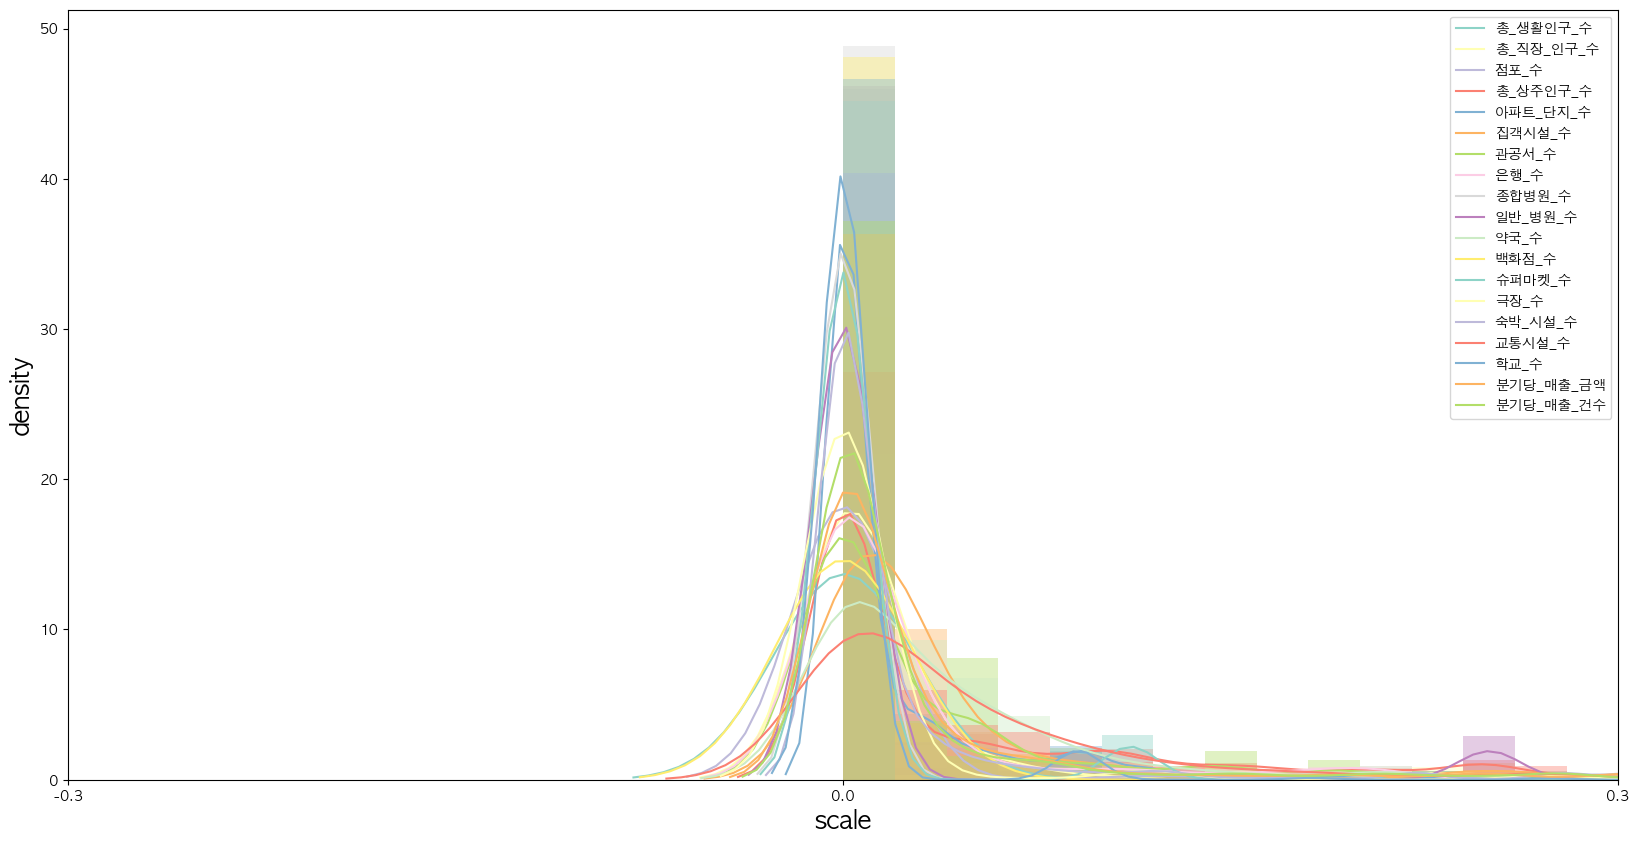

In [271]:
color = sns.color_palette("Set3", len(minmax_scaling_data.columns))
plt.rcParams['figure.figsize'] = (20, 10)
for idx, column in enumerate(num_columns):
  sns.distplot(minmax_scaling_data[column], color=color[idx])

plt.legend(num_columns)
plt.ylabel('density', fontsize=18)
plt.xlabel('scale', fontsize=18)
plt.xlim([-0.3, 0.3])
plt.xticks([-0.3, 0, 0.3])
# plt.xlim([-1, 1])
# plt.xticks([-1, 0, 1])
plt.show()

### 3-2. 표준화(Standardization)

전반적으로 아주 살짝 편향되는 분포가 나타났지만 그 정도가 크지 않으므로 정규화까지 진행한 상태에서 분석을 진행한다. 클러스터링에 문제가 생겼다고 판단할 경우 아래의 코드를 실행하여 z-score (표준점수)를 통해 표준화를 진행한다.

In [272]:
standard_scaler = StandardScaler()
standard_scaling_data = standard_scaler.fit_transform(minmax_scaling_data[num_columns])
standard_scaling_data

array([[-0.12989474,  0.8765671 ,  0.49946507, ..., -0.20141681,
         0.25756664,  0.34672606],
       [-0.12989474,  0.8765671 ,  0.49946507, ..., -0.20141681,
         0.33177888,  0.45758669],
       [-0.12989474,  0.8765671 ,  0.49946507, ..., -0.20141681,
         0.32754245,  0.40588762],
       ...,
       [-0.25672621, -0.25891106, -0.24706587, ..., -0.20141681,
        -0.18258934, -0.1066648 ],
       [-0.25672621, -0.25891106, -0.24706587, ..., -0.20141681,
        -0.212508  , -0.1598368 ],
       [-0.25672621, -0.25891106, -0.24706587, ..., -0.20141681,
        -0.17110037, -0.10149   ]])

## 4. 데이터 시각화

폐업률 추가 후 시각화

In [273]:
fail

,기준_년_코드,상권_구분_코드_명,상권_코드_명,개업_율,개업_점포_수,폐업_률,폐업_점포_수
34,2022,관광특구,강남 마이스 관광특구,0,0,9,1
102,2022,관광특구,잠실 관광특구,2,1,2,1
191,2022,관광특구,종로?청계 관광특구,7,3,5,2
285,2022,관광특구,동대문패션타운 관광특구,3,1,3,1
370,2022,관광특구,명동 남대문 북창동 다동 무교동 관광특구,3,3,3,3
460,2022,관광특구,이태원 관광특구,4,1,0,0
543,2022,관광특구,강남 마이스 관광특구,0,0,0,0
611,2022,관광특구,잠실 관광특구,0,0,0,0
700,2022,관광특구,종로?청계 관광특구,0,0,2,1
794,2022,관광특구,동대문패션타운 관광특구,5,2,0,0


In [274]:
df = pd.merge(data, fail, how='outer')
df

,총_생활인구_수,상권_구분_코드_명,상권_코드_명,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,기준_년_코드,상권_구분_코드,상권_코드,...,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,개업_율,개업_점포_수,폐업_률,폐업_점포_수
0,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,0.0,0.0
1,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
2,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,14.0,2.0
3,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,13.0,2.0,13.0,2.0
4,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.868189e+09,350641.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,NaN,관광특구,종로?청계 관광특구,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,0.0
24667,NaN,관광특구,종로?청계 관광특구,NaN,NaN,NaN,NaN,2020.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,1.0
24668,NaN,관광특구,종로?청계 관광특구,NaN,NaN,NaN,NaN,2020.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,10.0,4.0
24669,NaN,관광특구,종로?청계 관광특구,NaN,NaN,NaN,NaN,2020.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,5.0,2.0


In [275]:
df.columns

Index(['총_생활인구_수', '상권_구분_코드_명', '상권_코드_명', '총_직장_인구_수', '점포_수', '총_상주인구_수',
       '아파트_단지_수', '기준_년_코드', '상권_구분_코드', '상권_코드', '집객시설_수', '관공서_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수', '분기당_매출_금액', '분기당_매출_건수', '개업_율', '개업_점포_수', '폐업_률',
       '폐업_점포_수'],
      dtype='object')

In [276]:
num_columns = ['총_생활인구_수', '총_직장_인구_수', '점포_수', '총_상주인구_수',
       '아파트_단지_수', '집객시설_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수','교통시설_수', '학교_수','분기당_매출_금액', '분기당_매출_건수','개업_율','개업_점포_수','폐업_률','폐업_점포_수']
df_num=df[num_columns]
df_num

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,...,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,개업_율,개업_점포_수,폐업_률,폐업_점포_수
0,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,0.0,0.0
1,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
2,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,14.0,2.0
3,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,13.0,2.0,13.0,2.0
4,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.868189e+09,350641.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,0.0,0.0
24667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,1.0
24668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,10.0,4.0
24669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,5.0,2.0


In [277]:
df_num.drop_duplicates()

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,...,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,개업_율,개업_점포_수,폐업_률,폐업_점포_수
0,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,0.0,0.0
1,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
2,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,14.0,2.0
3,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,13.0,2.0,13.0,2.0
4,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.868189e+09,350641.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,7.0,3.0
24665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,4.0,2.0
24667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2.0,1.0
24668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,10.0,4.0


In [278]:
df=df.dropna(axis=0)

In [281]:
# df_num = df_num.fillna(0)
df_num.head()

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,...,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,개업_율,개업_점포_수,폐업_률,폐업_점포_수
0,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,0.0,0.0
1,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
2,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,14.0,2.0
3,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,13.0,2.0,13.0,2.0
4,946905.0,127232.0,22.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.868189e+09,350641.0,0.0,0.0,0.0,0.0


In [181]:
print(len(df_num.columns))

22


In [282]:
df_num.describe()

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,...,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,개업_율,개업_점포_수,폐업_률,폐업_점포_수
count,2.465100e+04,24651.000000,24651.000000,24651.000000,24651.000000,24651.000000,24651.000000,24651.000000,24651.000000,24651.000000,...,24651.000000,24651.000000,24651.000000,24651.000000,2.465100e+04,2.465100e+04,6420.000000,6420.000000,6420.000000,6420.000000
mean,6.127493e+06,72276.174435,23.348911,35447.888686,179.376212,64.771044,5.795951,0.091720,0.139224,4.658553,...,3.343678,3.616243,8.743337,0.342745,2.328408e+09,3.727022e+05,2.825701,1.100935,3.947352,1.524455
std,1.233160e+07,187732.280685,49.134712,53468.325468,382.952860,125.873239,13.592680,0.388664,0.447403,9.050575,...,9.997185,7.446157,13.469510,1.155447,3.891420e+09,6.262758e+05,4.555417,1.179127,4.529425,1.580038
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,336.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,2704.000000,0.000000,1972.000000,0.000000,13.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,1.890977e+08,2.796700e+04,2.000000,1.000000,3.000000,1.000000
75%,9.469050e+05,46712.000000,24.000000,50087.000000,219.000000,52.000000,7.000000,0.000000,0.000000,3.000000,...,0.000000,2.000000,12.000000,0.000000,2.013462e+09,3.656210e+05,4.000000,2.000000,6.000000,2.000000
max,3.810691e+07,838640.000000,202.000000,469380.000000,7556.000000,593.000000,63.000000,3.000000,4.000000,43.000000,...,51.000000,72.000000,52.000000,11.000000,2.396625e+10,4.345752e+06,25.000000,4.000000,17.000000,6.000000


In [170]:
df.to_csv('./data/df.csv')

In [310]:
df

,총_생활인구_수,상권_구분_코드_명,상권_코드_명,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,기준_년_코드,상권_구분_코드,상권_코드,...,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,개업_율,개업_점포_수,폐업_률,폐업_점포_수
0,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,0.0,0.0
1,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
2,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,14.0,2.0
3,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,13.0,2.0,13.0,2.0
4,946905.0,관광특구,강남 마이스 관광특구,127232.0,22.0,552.0,0.0,2021.0,U,1001496.0,...,0.0,0.0,9.0,0.0,1.868189e+09,350641.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,31172746.0,관광특구,잠실 관광특구,195000.0,110.0,175007.0,260.0,2020.0,U,1001495.0,...,23.0,22.0,34.0,0.0,1.311012e+10,1835584.0,2.0,1.0,7.0,4.0
6396,31172746.0,관광특구,잠실 관광특구,195000.0,110.0,175007.0,260.0,2020.0,U,1001495.0,...,23.0,22.0,34.0,0.0,9.131541e+09,1496686.0,2.0,1.0,2.0,1.0
6397,31172746.0,관광특구,잠실 관광특구,195000.0,110.0,175007.0,260.0,2020.0,U,1001495.0,...,23.0,22.0,34.0,0.0,9.131541e+09,1496686.0,0.0,0.0,2.0,1.0
6398,31172746.0,관광특구,잠실 관광특구,195000.0,110.0,175007.0,260.0,2020.0,U,1001495.0,...,23.0,22.0,34.0,0.0,9.131541e+09,1496686.0,6.0,3.0,6.0,3.0


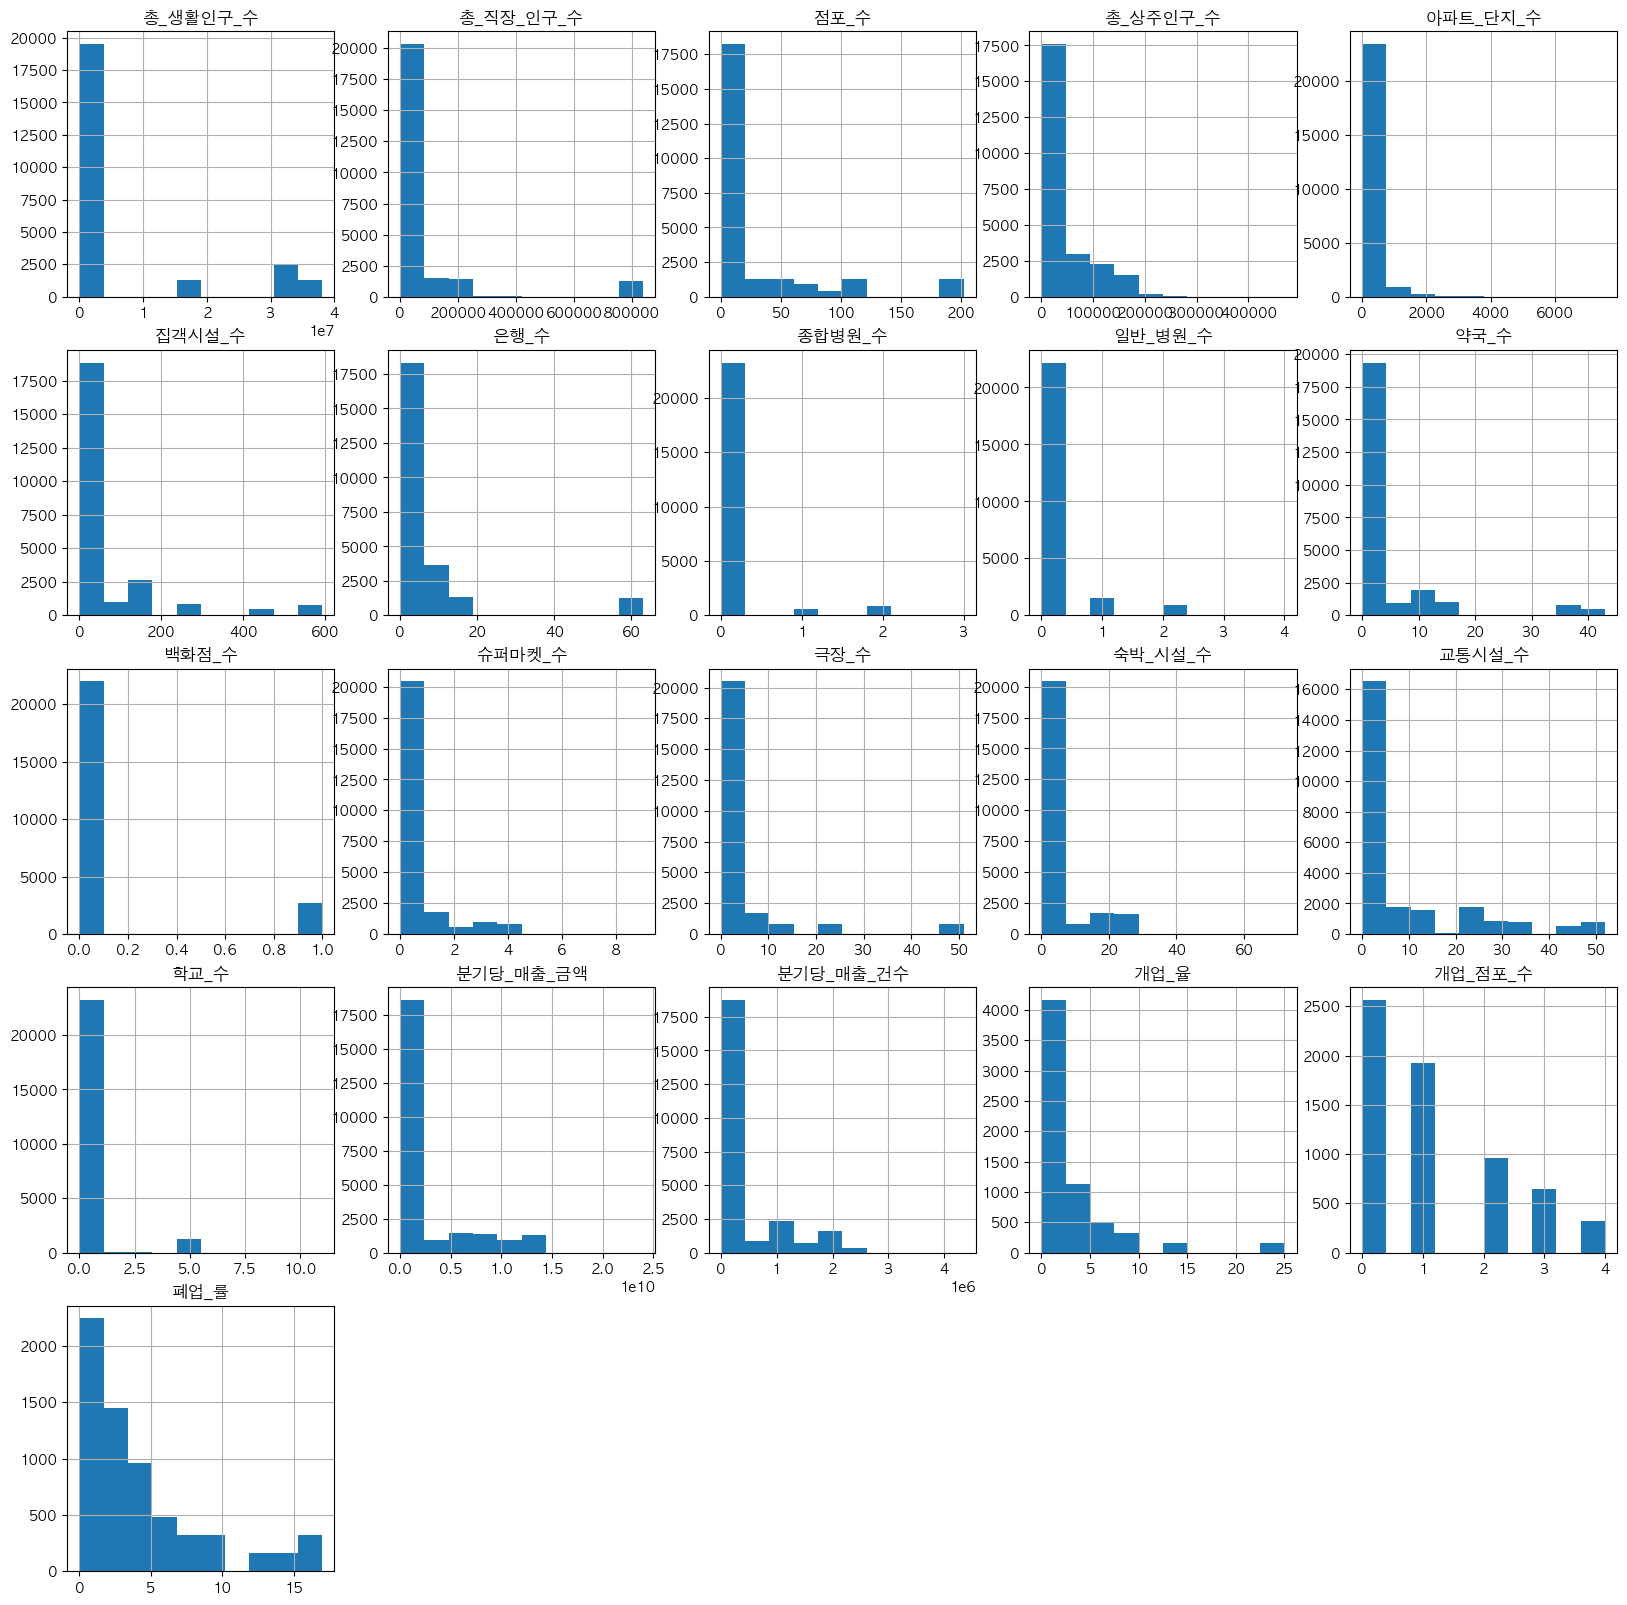

In [283]:
plt.figure(figsize = (20, 20))
for i in range(len(df_num.describe().columns) - 1 ):
    plt.subplot(5, 5, i + 1)
    plt.title(df_num.describe().columns[i])
    plt.hist(df_num[df_num.describe().columns[i]],bins = 10)
    plt.grid()

In [284]:
def summary_numeric(col):
    print(col)
    print("평균 {:>15}".format(format(df_num[col].mean(), ",.2f")))
    print("최소 {:>15}".format(format(df_num[col].min(), ",.2f")))
    print("중앙 {:>15}".format(format(df_num[col].median(), ",.2f")))
    print("최대 {:>15}".format(format(df_num[col].max(), ",.2f")))

In [285]:
summary_numeric("폐업_률")

폐업_률
평균            3.95
최소            0.00
중앙            3.00
최대           17.00


In [286]:
# 폐업률 상위 5개
df_num.sort_values(by=['폐업_률'],ascending=[False]).head()

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,...,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,개업_율,개업_점포_수,폐업_률,폐업_점포_수
165,946905.0,127232.0,24.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.868189e+09,350641.0,0.0,0.0,17.0,2.0
225,946905.0,127232.0,24.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
401,946905.0,127232.0,32.0,552.0,0.0,52.0,10.0,0.0,0.0,2.0,...,6.0,0.0,14.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
561,946905.0,127232.0,24.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.680206e+09,305331.0,0.0,0.0,17.0,2.0
181,946905.0,127232.0,24.0,552.0,0.0,34.0,8.0,0.0,0.0,3.0,...,0.0,0.0,9.0,0.0,1.868189e+09,350641.0,0.0,0.0,17.0,2.0


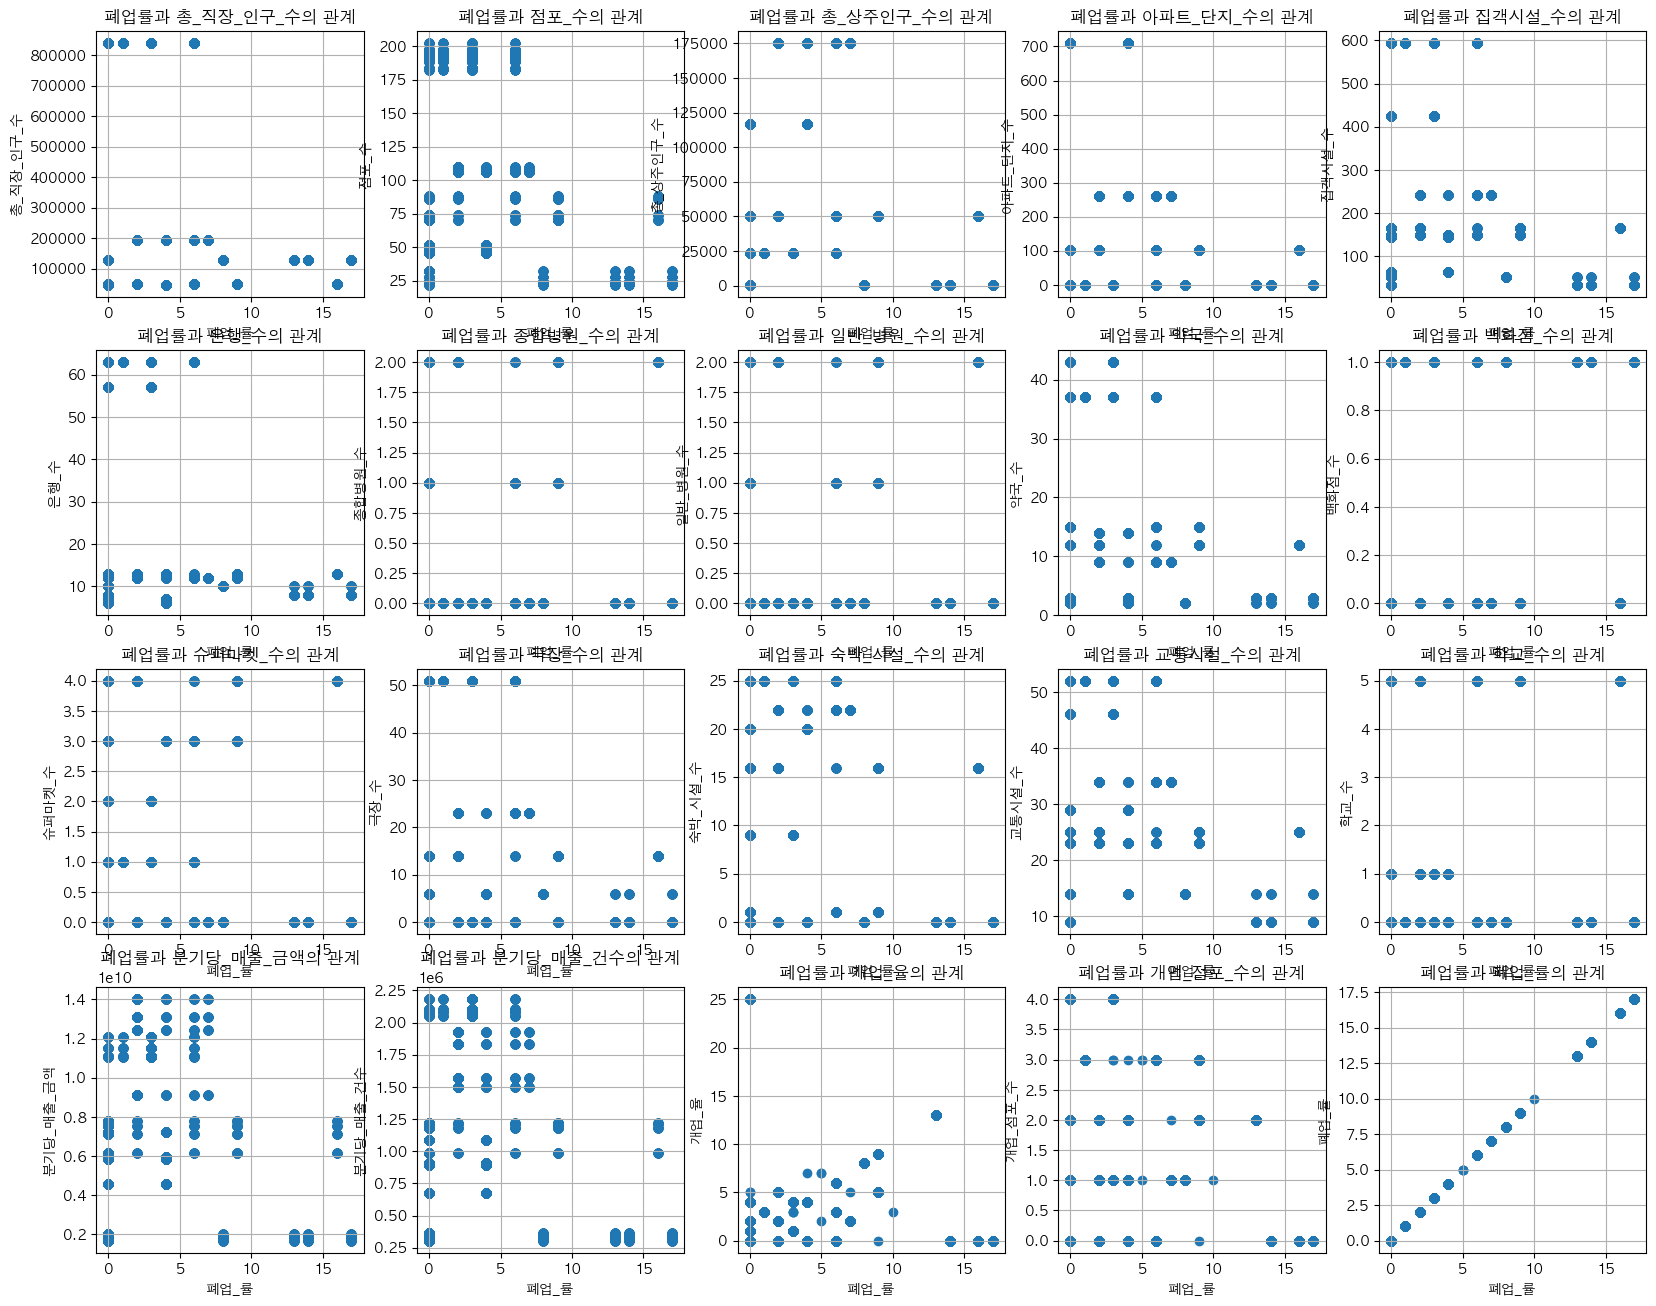

In [287]:
# 폐업률에 영향을 주는 항목 확인하기 위한 산점도

plt.figure(figsize = (20, 20))

for i in range(1, len(df_num.describe().columns) - 1 ):
    plt.subplot(5, 5, i)
    plt.title("폐업률과 {}의 관계".format(df_num.describe().columns[i]))
    plt.xlabel("폐업_률")
    plt.ylabel(df_num.describe().columns[i])
    plt.scatter(x = df_num["폐업_률"], y = df_num[df_num.describe().columns[i]])
    plt.grid()

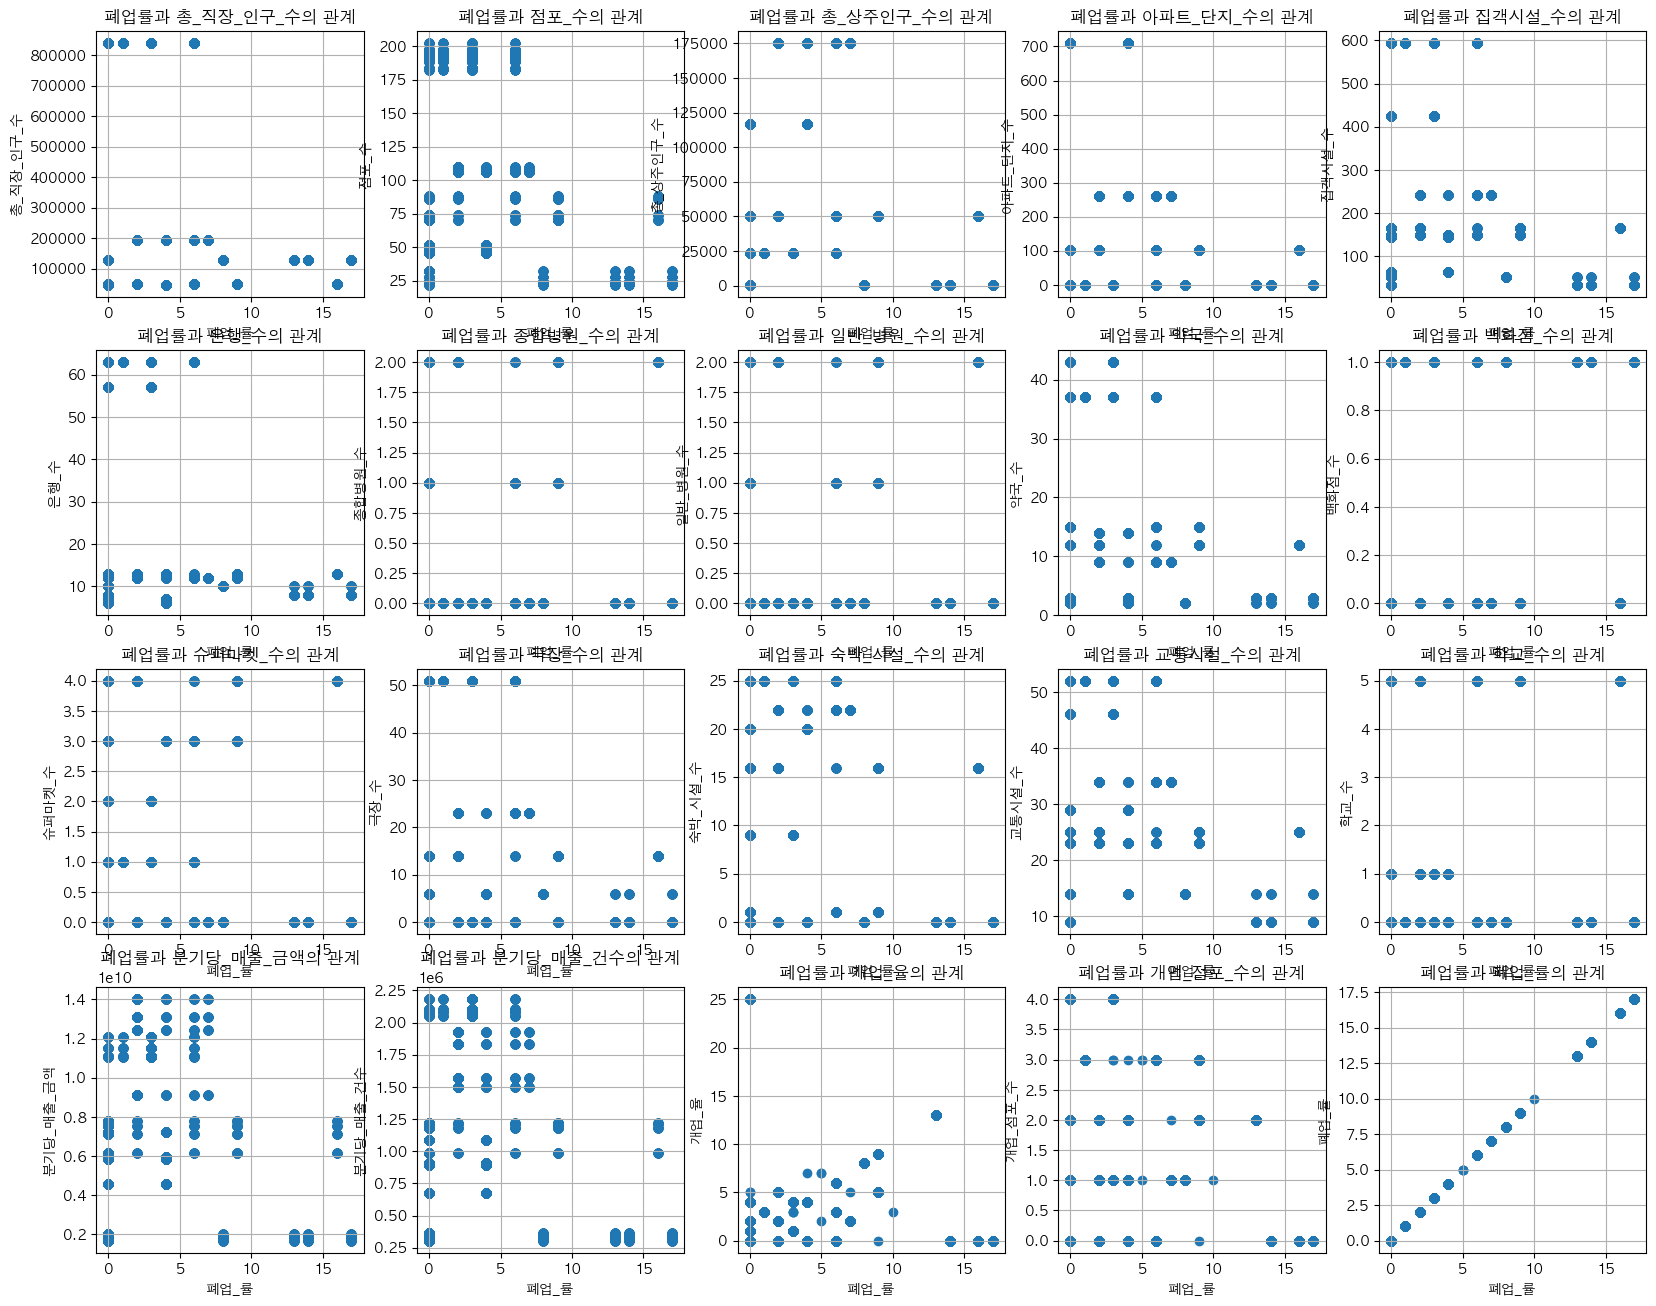

In [288]:
plt.figure(figsize = (20, 20))

for i in range(1, len(df_num.describe().columns) - 1 ):
    plt.subplot(5, 5, i)
    plt.title("폐업률과 {}의 관계".format(df_num.describe().columns[i]))
    plt.xlabel("폐업_률")
    plt.ylabel(df_num.describe().columns[i])
    plt.scatter(x = df_num["폐업_률"].loc[df_num["폐업_률"] <= 17], y = df_num[df_num.describe().columns[i]].loc[df_num["폐업_률"] <= 17])
    plt.grid()

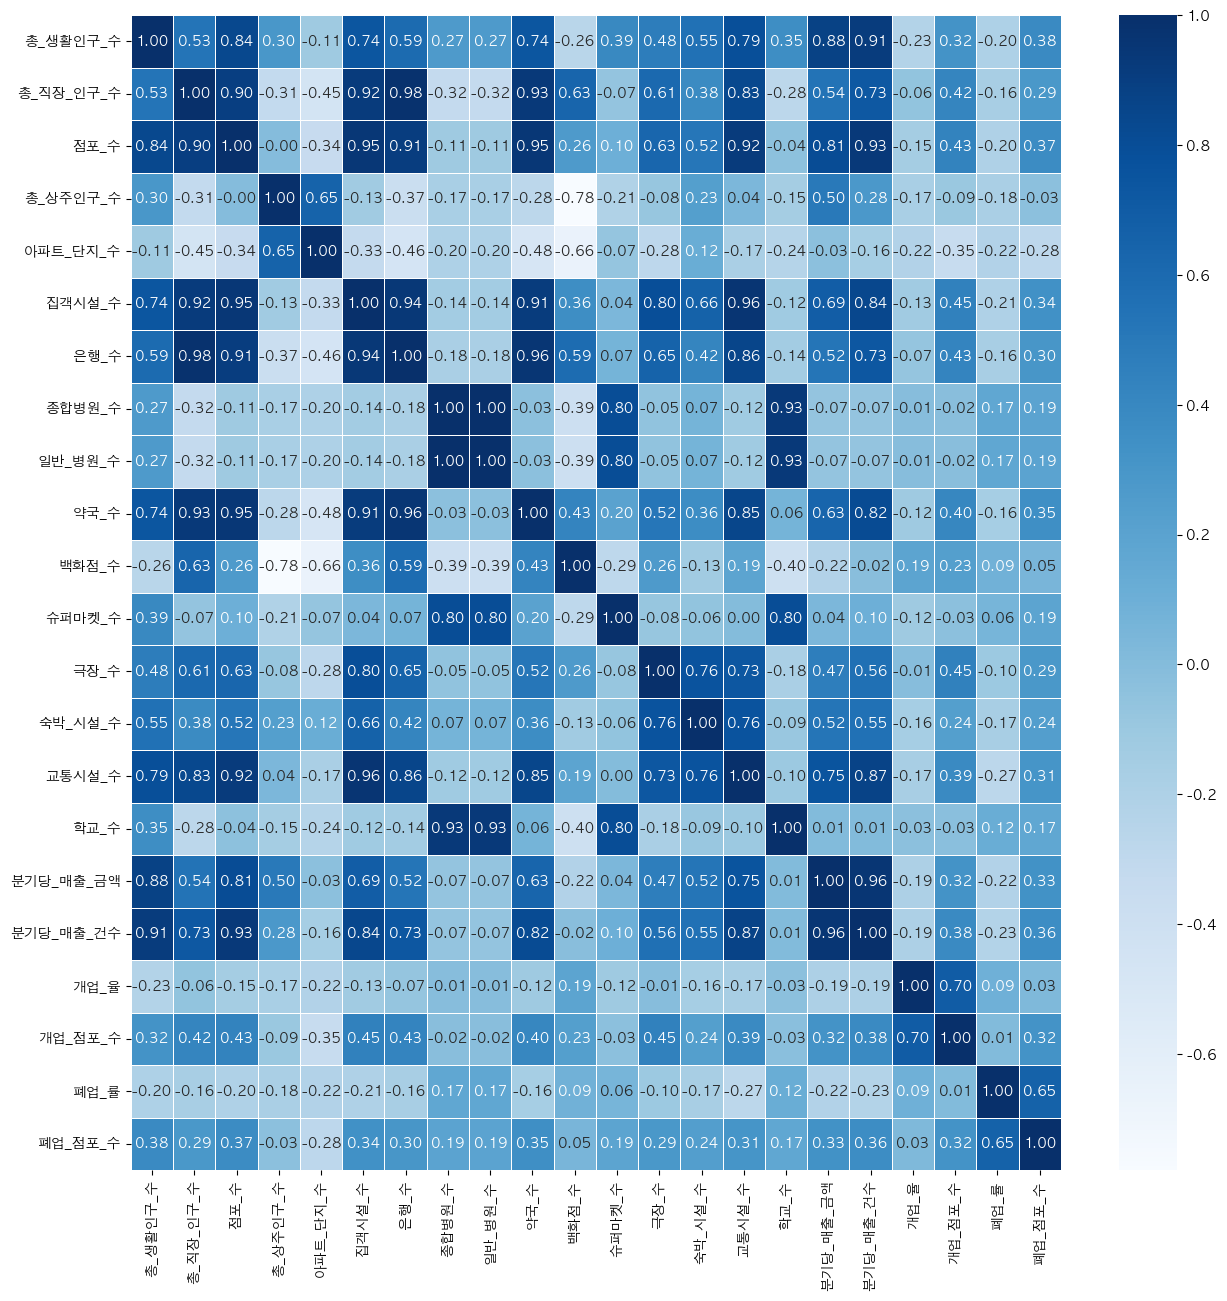

In [289]:
# 폐업률과의 상관관계
plt.figure(figsize = (15,15))
sns.heatmap(data = df_num.loc[df_num["폐업_률"]<=17].corr(method="pearson"), annot = True, fmt = ".2f", linewidths = .5, cmap = "Blues");

## 5. 알고리즘 선정

In [197]:
from collections import Counter

In [290]:
df2=df.dropna(axis=0)

In [291]:
x=df2[['총_생활인구_수', '총_직장_인구_수', '점포_수', '총_상주인구_수',
       '아파트_단지_수', '집객시설_수', '관공서_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수', '분기당_매출_금액', '분기당_매출_건수', '개업_율', '개업_점포_수']]
y=df2[['폐업_률']]

In [292]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
le=LabelEncoder()
y=le.fit_transform(y)
rs=RobustScaler()
x=rs.fit_transform(x)

Class=0, n=2080 (32.500%)
Class=12, n=160 (2.500%)
Class=10, n=160 (2.500%)
Class=9, n=160 (2.500%)
Class=7, n=160 (2.500%)
Class=8, n=320 (5.000%)
Class=5, n=480 (7.500%)
Class=11, n=160 (2.500%)
Class=2, n=800 (12.500%)
Class=3, n=640 (10.000%)
Class=1, n=160 (2.500%)
Class=4, n=960 (15.000%)
Class=6, n=160 (2.500%)


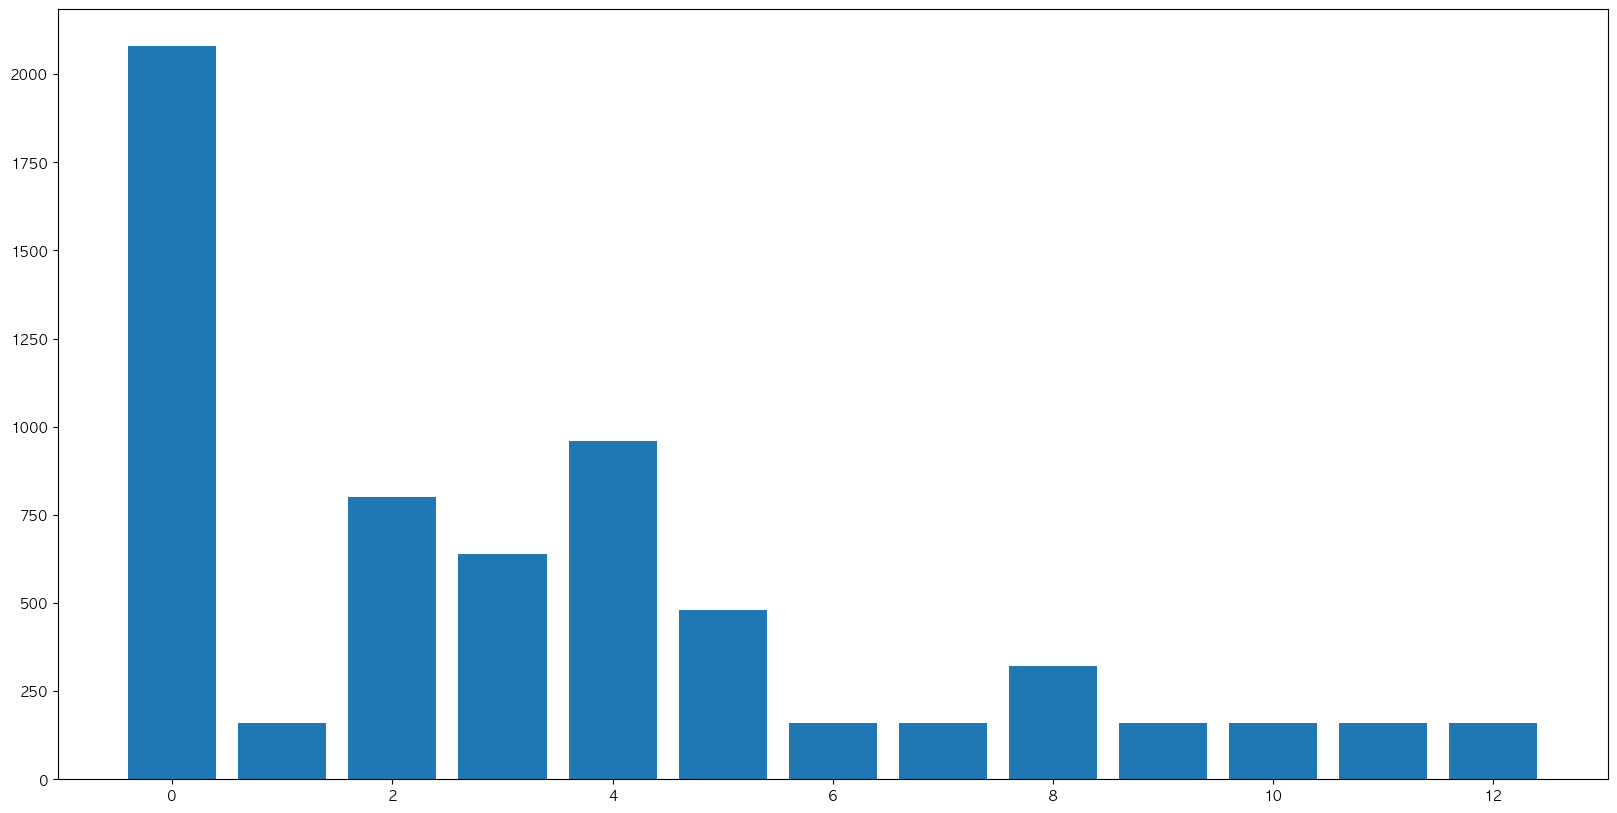

In [293]:
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [294]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)


In [295]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 3, random_state = 99).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)

import sklearn.metrics as met


print('Accuracy:',met.accuracy_score(y_test, rf_pred))
print('Precision:',met.precision_score(y_test, rf_pred, average = 'macro'))
print('Recall:',met.recall_score(y_test, rf_pred, average = 'macro'))
print('F1 score:',met.f1_score(y_test, rf_pred, average = 'macro'))

Accuracy: 0.6015625
Precision: 0.24627454627527165
Recall: 0.3295758743261056
F1 score: 0.2769953485633256


In [296]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

rf=DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)
rf_pred=rf.predict(X_test)
import sklearn.metrics as met

print('Accuracy:',met.accuracy_score(y_test, rf_pred))
print('Precision:',met.precision_score(y_test, rf_pred, average = 'macro'))
print('Recall:',met.recall_score(y_test, rf_pred, average = 'macro'))
print('F1 score:',met.f1_score(y_test, rf_pred, average = 'macro'))

Accuracy: 0.67265625
Precision: 0.3552487320986135
Recall: 0.46395707104944284
F1 score: 0.3885602400360143


In [297]:
from sklearn.naive_bayes import GaussianNB
rf = GaussianNB().fit(X_train,y_train)
rf_pred = rf.predict(X_test)
import sklearn.metrics as met

#print('Confusion Matrix: \n', met.confusion_matrix(y_test, rf_pred))
print('Accuracy:',met.accuracy_score(y_test, rf_pred))
print('Precision:',met.precision_score(y_test, rf_pred, average = 'macro'))
print('Recall:',met.recall_score(y_test, rf_pred, average = 'macro'))
print('F1 score:',met.f1_score(y_test, rf_pred, average = 'macro'))

Accuracy: 0.49296875
Precision: 0.533810659437149
Recall: 0.709985412367466
F1 score: 0.5419070207608766


In [298]:
from sklearn import svm
rf = svm.LinearSVC(C=1).fit(X_train,y_train)
rf_pred = rf.predict(X_test)
#rf_prob=rf.predict_proba(X_test)
import sklearn.metrics as met

print('Accuracy:',met.accuracy_score(y_test, rf_pred))
print('Precision:',met.precision_score(y_test, rf_pred, average = 'macro'))
print('Recall:',met.recall_score(y_test, rf_pred, average = 'macro'))
print('F1 score:',met.f1_score(y_test, rf_pred, average = 'macro'))

Accuracy: 0.63203125
Precision: 0.4740171917254952
Recall: 0.5521728671184878
F1 score: 0.4980104855122648


In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
rf = LogisticRegression(C = 1.0, random_state = 0).fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Accuracy:',met.accuracy_score(y_test, rf_pred))
print('Precision:',met.precision_score(y_test, rf_pred, average = 'macro'))
print('Recall:',met.recall_score(y_test, rf_pred, average = 'macro'))
print('F1 score:',met.f1_score(y_test, rf_pred, average = 'macro'))

Accuracy: 0.63828125
Precision: 0.4399940837868416
Recall: 0.5011789172481335
F1 score: 0.45432917681111257


In [300]:
from xgboost import plot_importance
from xgboost import XGBClassifier
xgb= XGBClassifier(n_estimators=500, learning_rate=0.1,max_depth=4)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print('Accuracy:',met.accuracy_score(y_test, xgb_pred))
print('Precision:',met.precision_score(y_test, xgb_pred, average = 'macro'))
print('Recall:',met.recall_score(y_test, xgb_pred, average = 'macro'))
print('F1 score:',met.f1_score(y_test, xgb_pred, average = 'macro'))

Accuracy: 0.71171875
Precision: 0.5775289398048609
Recall: 0.5979230283677126
F1 score: 0.5808354531520412


## 6. 선정된 알고리즘 적용
### XGBoos를 활용하여 중요 변수 찾기

In [301]:
from xgboost import plot_importance
from xgboost import XGBClassifier


x=df2[['총_생활인구_수', '총_직장_인구_수', '총_상주인구_수',
       '아파트_단지_수', '집객시설_수', '은행_수',
       '종합병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수', '분기당_매출_금액', '분기당_매출_건수']]
y=df2[['폐업_률']]

In [302]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)
print(X_train.shape, X_test.shape)

(5120, 16) (1280, 16)


In [303]:
X_train

,총_생활인구_수,총_직장_인구_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
1744,31040824.0,48432.0,50087.0,101.0,165.0,13.0,2.0,12.0,0.0,4.0,14.0,16.0,25.0,5.0,6.176619e+09,986948.0
4922,16874995.0,46712.0,116757.0,709.0,144.0,7.0,0.0,3.0,0.0,0.0,6.0,20.0,29.0,0.0,5.961324e+09,912212.0
5446,31172746.0,195000.0,175007.0,260.0,242.0,12.0,0.0,9.0,0.0,0.0,23.0,22.0,34.0,0.0,1.400975e+10,1924645.0
3303,37673727.0,838640.0,23476.0,0.0,593.0,63.0,0.0,37.0,1.0,1.0,51.0,25.0,52.0,0.0,1.152732e+10,2180652.0
4793,16874995.0,46712.0,116757.0,709.0,144.0,7.0,0.0,3.0,0.0,0.0,6.0,20.0,29.0,0.0,5.961324e+09,912212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,31040824.0,48432.0,50087.0,101.0,149.0,12.0,1.0,15.0,0.0,3.0,0.0,1.0,23.0,5.0,7.550124e+09,1210162.0
1737,31040824.0,48432.0,50087.0,101.0,149.0,12.0,1.0,15.0,0.0,3.0,0.0,1.0,23.0,5.0,7.550124e+09,1210162.0
3240,37673727.0,838640.0,23476.0,0.0,593.0,63.0,0.0,37.0,1.0,1.0,51.0,25.0,52.0,0.0,1.104942e+10,2081538.0
5305,31172746.0,195000.0,175007.0,260.0,149.0,13.0,0.0,14.0,0.0,0.0,0.0,0.0,23.0,1.0,1.311012e+10,1835584.0


In [304]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [305]:

xgb = XGBClassifier(n_estimators=20000, learning_rate = 0.1, max_depth = 4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


<AxesSubplot: >

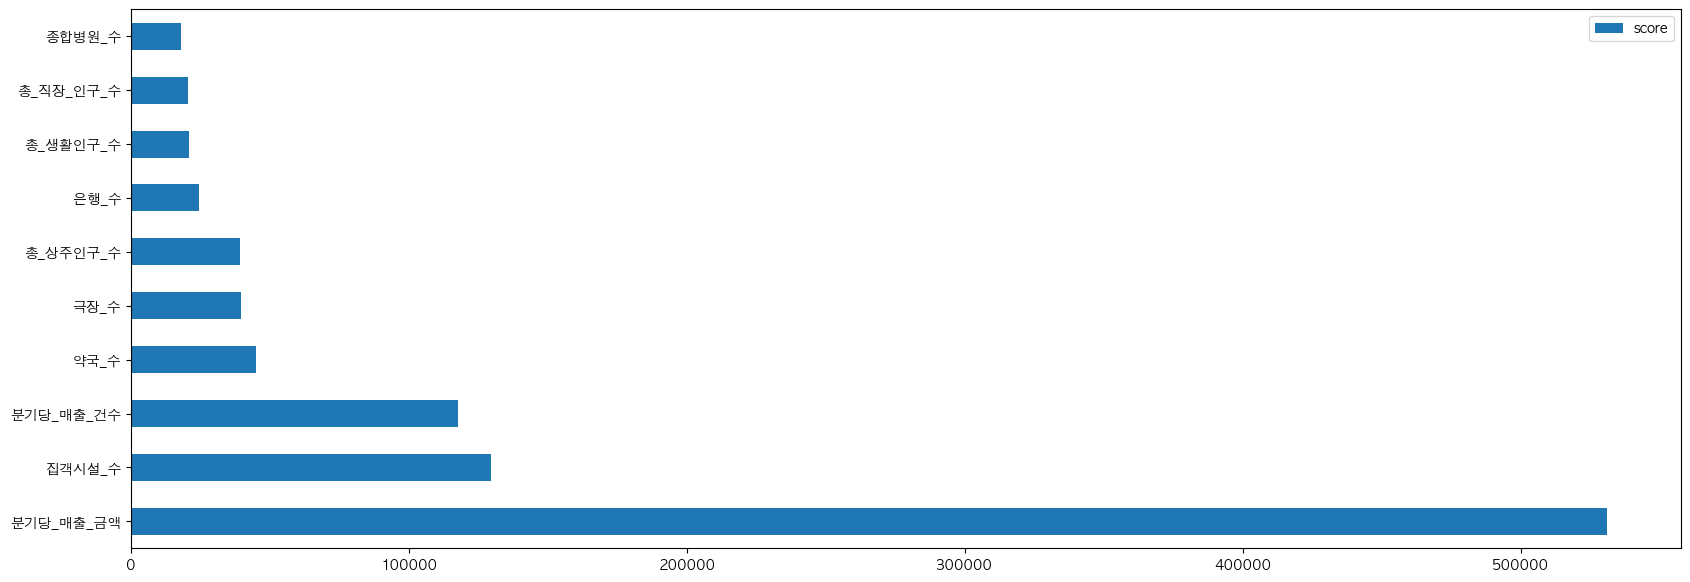

In [306]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')
